In [37]:
#importing libraries
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")


### Merging all the data csv of crytocurrencies

In [38]:
path = 'c:\\Data'
res = os.listdir(path)

df = pd.DataFrame()
for file in res:
    if file.endswith(".csv"):
        df = pd.concat([df , pd.read_csv(os.path.join(path, file),infer_datetime_format=True)], axis=0 )

df.reset_index(drop=True, inplace=True)
df.drop('SNo',axis=1 ,inplace=True)
df

Name Symbol                 Date       High        Low       Open  \
0      Aave   AAVE  2020-10-05 23:59:59  55.112358  49.787900  52.675035   
1      Aave   AAVE  2020-10-06 23:59:59  53.402270  40.734578  53.291969   
2      Aave   AAVE  2020-10-07 23:59:59  42.408314  35.970690  42.399947   
3      Aave   AAVE  2020-10-08 23:59:59  44.902511  36.696057  39.885262   
4      Aave   AAVE  2020-10-09 23:59:59  47.569533  43.291776  43.764463   
...     ...    ...                  ...        ...        ...        ...   
37077   XRP    XRP  2021-07-02 23:59:59   0.667287   0.634726   0.659890   
37078   XRP    XRP  2021-07-03 23:59:59   0.683677   0.644653   0.655639   
37079   XRP    XRP  2021-07-04 23:59:59   0.707783   0.665802   0.673218   
37080   XRP    XRP  2021-07-05 23:59:59   0.695653   0.648492   0.695653   
37081   XRP    XRP  2021-07-06 23:59:59   0.679923   0.652676   0.653055   

           Close        Volume     Marketcap  
0      53.219243  0.000000e+00  8.912813e+07  
1      42.401599  5.830915e+05  7.101144e+07  
2      40.083976  6.828342e+05  6.713004e+07  
3      43.764463  1.658817e+06  2.202651e+08  
4      46.817744  8.155377e+05  2.356322e+08  
...          ...           ...           ...  
37077   0.656763  2.061607e+09  3.030759e+10  
37078   0.672888  1.872820e+09  3.105172e+10  
37079   0.694945  1.885242e+09  3.206960e+10  
37080   0.654300  2.076373e+09  3.019395e+10  
37081   0.665402  1.938959e+09  3.072284e+10  

[37082 rows x 9 columns]

In [39]:
df['Date']=pd.to_datetime(df['Date']).dt.date

In [40]:
df.to_csv('final.csv')

# Finding the top 5 crytpocurrencies by market cap

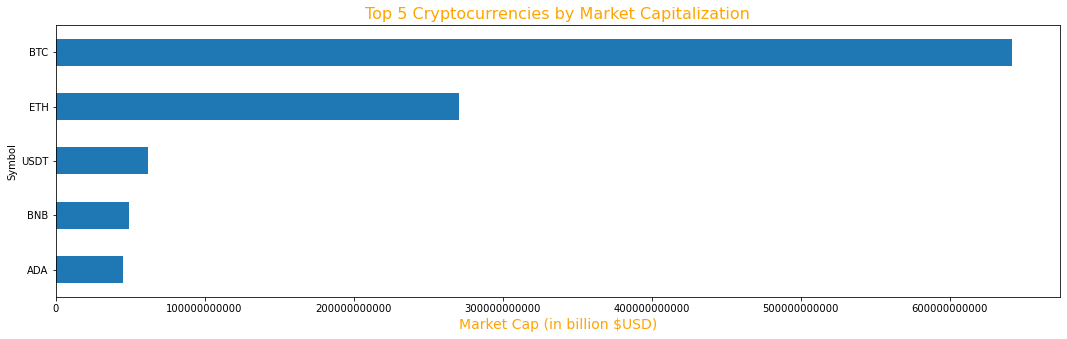

In [41]:
plt.figure(figsize=(18,5))
ax = df.groupby(['Symbol'])['Marketcap'].last().sort_values(ascending=False).head(5).sort_values().plot(kind='barh')
ax.set_xlabel("Market Cap (in billion $USD)", fontsize=14, color='Orange')
ax.ticklabel_format( style='plain', axis='x')
plt.title("Top 5 Cryptocurrencies by Market Capitalization", fontsize=16,color='Orange')
plt.show()

### Observation:
Here we can see that Bitcoin is the highest value according to market cap and etherum is 50% of it.
and all other are very less in comparison to it and USDT is 3 times less then the Etherum

### Plotting Graphs of Closing Prices of Top 4 Cryptocurrencies as per Market Cap

In [42]:
dx=df.copy()

top_4_currency_names = dx.groupby(['Symbol'])['Marketcap'].last().sort_values(ascending=False).head(4).index
top_4_currency_names_except_first=dx[dx['Symbol']!='BTC'].groupby(['Symbol'])['Marketcap'].last().sort_values(ascending=False).head(4).index
top_4_currency_names_except_first_two=dx[(dx['Symbol']!='BTC') & (dx['Symbol']!='ETH')].groupby(['Symbol'])['Marketcap'].last().sort_values(ascending=False).head(4).index
top_4_currency_names_except_first_two_three=dx[(dx['Symbol']!='BTC') & (dx['Symbol']!='ETH')& (dx['Symbol']!='USDT')].groupby(['Symbol'])['Marketcap'].last().sort_values(ascending=False).head(4).index


data_top_4_currencies = dx[dx['Symbol'].isin(top_4_currency_names)]
top_4_currencies_after_BTC = dx[dx['Symbol'].isin(top_4_currency_names_except_first)]
top_4_currencies_after_BTC_ETH = dx[dx['Symbol'].isin(top_4_currency_names_except_first_two)]
top_4_currencies_after_BTC_ETH_USDT = dx[dx['Symbol'].isin(top_4_currency_names_except_first_two_three)]
top_4_currencies_after_BTC_ETH_USDT


Name Symbol        Date      High       Low      Open  \
275    Binance Coin    BNB  2017-07-26  0.109013  0.099266  0.105893   
276    Binance Coin    BNB  2017-07-27  0.108479  0.100888  0.105108   
277    Binance Coin    BNB  2017-07-28  0.109019  0.101473  0.107632   
278    Binance Coin    BNB  2017-07-29  0.111264  0.101108  0.104782   
279    Binance Coin    BNB  2017-07-30  0.108138  0.103162  0.107935   
...             ...    ...         ...       ...       ...       ...   
37077           XRP    XRP  2021-07-02  0.667287  0.634726  0.659890   
37078           XRP    XRP  2021-07-03  0.683677  0.644653  0.655639   
37079           XRP    XRP  2021-07-04  0.707783  0.665802  0.673218   
37080           XRP    XRP  2021-07-05  0.695653  0.648492  0.695653   
37081           XRP    XRP  2021-07-06  0.679923  0.652676  0.653055   

          Close        Volume     Marketcap  
275    0.105138  2.003950e+05  1.051380e+07  
276    0.107737  3.444990e+05  1.077370e+07  
277    0.104067  3.425680e+05  1.040670e+07  
278    0.107811  3.402180e+05  1.078110e+07  
279    0.106414  2.242610e+05  1.064140e+07  
...         ...           ...           ...  
37077  0.656763  2.061607e+09  3.030759e+10  
37078  0.672888  1.872820e+09  3.105172e+10  
37079  0.694945  1.885242e+09  3.206960e+10  
37080  0.654300  2.076373e+09  3.019395e+10  
37081  0.665402  1.938959e+09  3.072284e+10  

[8469 rows x 9 columns]

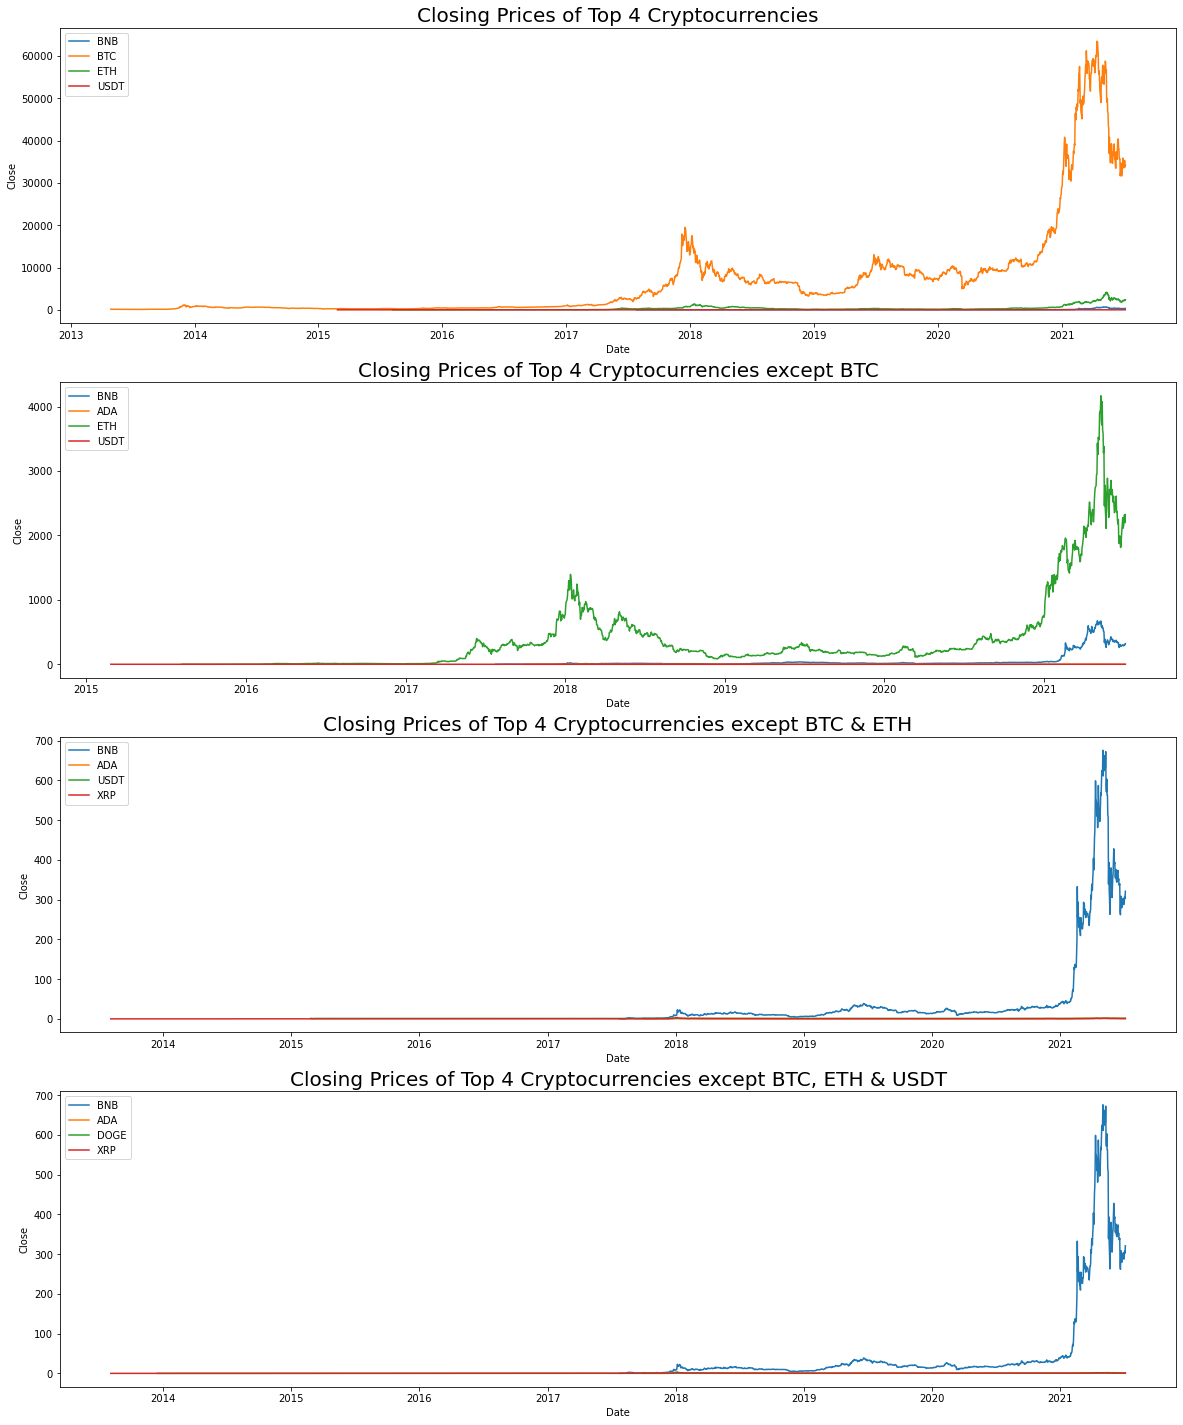

In [43]:
plt.figure(figsize=(20,25))

plt.subplot(4,1,1)
sns.lineplot(data=data_top_4_currencies, x="Date", y="Close", hue='Symbol')
plt.title("Closing Prices of Top 4 Cryptocurrencies", fontsize=20)
plt.legend(loc='upper left')
 
plt.subplot(4,1,2)
sns.lineplot(data=top_4_currencies_after_BTC, x="Date", y="Close", hue='Symbol')
plt.title("Closing Prices of Top 4 Cryptocurrencies except BTC", fontsize=20)
plt.legend(loc='upper left')

plt.subplot(4,1,3)
sns.lineplot(data=top_4_currencies_after_BTC_ETH,x="Date", y="Close", hue='Symbol')
plt.title("Closing Prices of Top 4 Cryptocurrencies except BTC & ETH", fontsize=20)
plt.legend(loc='upper left')

plt.subplot(4,1,4)
sns.lineplot(data=top_4_currencies_after_BTC_ETH_USDT,x="Date", y="Close", hue='Symbol')
plt.title("Closing Prices of Top 4 Cryptocurrencies except BTC, ETH & USDT", fontsize=20)
plt.legend(loc='upper left')

plt.show()


### Observation:
In 2021 the value of BTC was at all-time high of nearly 60,000$ which is almost 15 times more than the second-highest cryptocurrency ETH .

Among the top cryptocurrencies, the growth of BTC, ETH, and USDT over the last five years was beneficial for the investors.

In [44]:
for i in ['BTC','ETH','USDT','BNB','ADA']:
    options=[i]
    rslt_df = df[df['Symbol'].isin(options)] 
    layout = dict(
            title=f"{i} Candlestick Chart",
            xaxis=go.layout.XAxis(title=go.layout.xaxis.Title( text="Time")),
            yaxis=go.layout.YAxis(title=go.layout.yaxis.Title( text="Price US Dollars"))
    )
    data=[go.Candlestick(x=rslt_df['Date'],
                    open=rslt_df['Open'],
                    high=rslt_df['High'],
                    low=rslt_df['Low'],
                    close=rslt_df['Close'])]
    figSignal = go.Figure(data=data,layout=layout)

    figSignal.show()

### Observation:
The candlestick chart is a style of financial chart describing open, high, low and close for a given x coordinate (most likely time). The boxes represent the spread between the open and close values and the lines represent the spread between the low and high values. Sample points where the close value is higher (lower) then the open value are called increasing (decreasing). By default, increasing candles are drawn in green whereas decreasing are drawn in red.


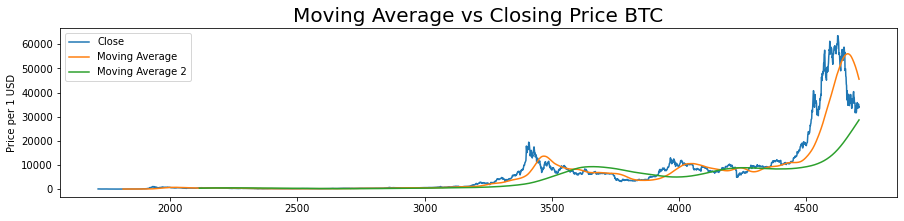

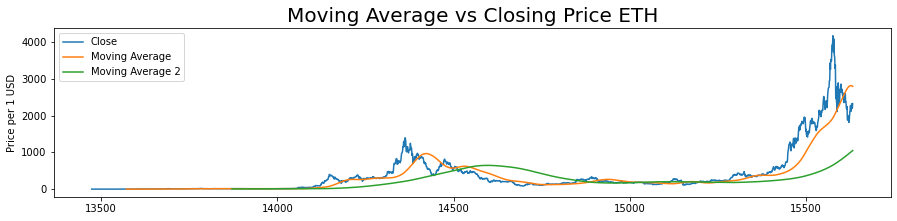

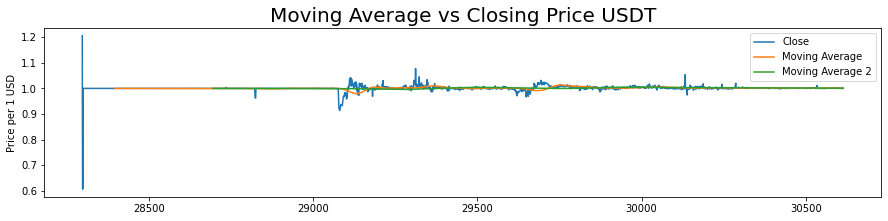

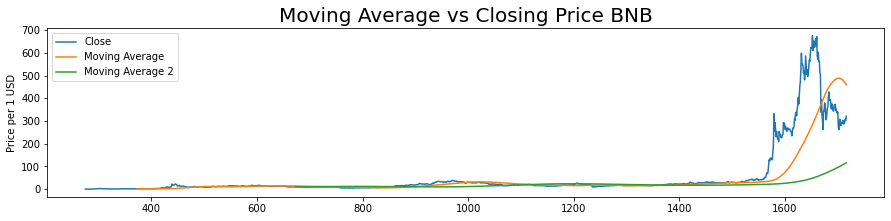

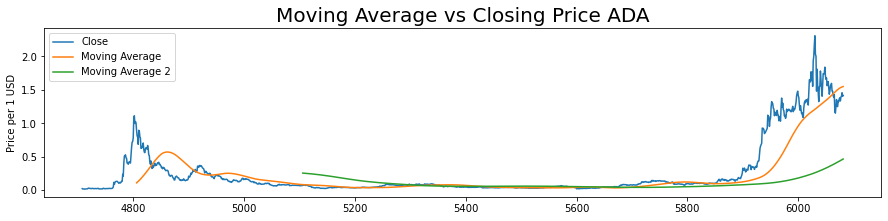

In [45]:
for i in ['BTC','ETH','USDT','BNB','ADA']:
    j=1
    dft=df[df['Symbol']==i]
    top_currency_name = dft.groupby(['Symbol'])['Marketcap'].last().sort_values(ascending=False).index
    top_currency = dft[dft['Symbol'].isin(top_currency_name)]
    top_currency['Moving Average']=top_currency['Close'].rolling(window=50).mean()
    top_currency['Moving Average 2']=top_currency['Close'].rolling(window=200).mean()
    plt.subplot(5,1,j)
    top_currency['Close'].plot(figsize=(15,18))
    ax=top_currency['Moving Average'].rolling(window=50).mean().plot()
    ax=top_currency['Moving Average 2'].rolling(window=200).mean().plot()
    ax.set_ylabel("Price per 1 USD");
    plt.title(f"Moving Average vs Closing Price {i}", fontsize=20);
    plt.legend()
    j=j+1
    plt.show()

### Observation:

In BTC and ETH

They have shown a pattern of 2 golden cross and 2 death cross over the years.
The last crossing point of moving averages was golden cross hence it was bullish.

In USDT

There are too many golden cross and death cross.
Hence it is volatile and should be avoided for the time being.

In [46]:
import plotly.express as px

In [47]:
area = px.area(data_frame= df , x = "Date" ,y= "High", line_group="Name" , color = "Name" , color_discrete_sequence=px.colors.qualitative.Alphabet_r,title = 'Area Plot for TOP Cryptocurrencies')

area.update_xaxes(
    title_text = 'Date',rangeslider_visible = True,rangeselector = dict(buttons = list([
            dict(count = 1, label = '1M', step = 'month', stepmode = 'backward'),
            dict(count = 6, label = '6M', step = 'month', stepmode = 'backward'),
            dict(count = 1, label = 'YTD', step = 'year', stepmode = 'todate'),
            dict(count = 1, label = '1Y', step = 'year', stepmode = 'backward'),
            dict(step = 'all')])))

area.update_yaxes(title_text = 'Price in USD', ticksuffix = '$')
area.update_layout(showlegend = True,title = {'text': 'Area Plot for TOP Cryptocurrencies','y':0.9,'x':0.5,'xanchor': 'center',
                                              'yanchor': 'top'})

area.show()

In [48]:
area = px.area(data_frame = df,y  = "Marketcap" , x = "Date" , line_group="Name", color = "Name",color_discrete_sequence=px.colors.qualitative.Alphabet, title = 'Market Cap Change of all Cryptocurrencies')

area.update_xaxes(title_text = 'Date',rangeslider_visible = True,rangeselector = dict(buttons = list([
            dict(count = 1, label = '1M', step = 'month', stepmode = 'backward'),
            dict(count = 6, label = '6M', step = 'month', stepmode = 'backward'),
            dict(count = 1, label = 'YTD', step = 'year', stepmode = 'todate'),
            dict(count = 1, label = '1Y', step = 'year', stepmode = 'backward'),
            dict(step = 'all')])))

area.update_yaxes(title_text = 'Percentage Change ', ticksuffix = '%')
area.update_layout(showlegend = True,title = {'text': 'MarKet Cap Change of all Cryptocurrencies','y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'})

area.show()

### Conclusion:
Bitcoin is the highest value according to market cap and etherum is 50% of it and all other are very less in comperision to it and USDT is 3 times less then the Etherum

Investment in penny cryptocurrencies should be avoided, as depicted by the candlestick chart of USDT.

It is visible in the candlestick chart of USDT that this cryptocurrency is volatile for a longer period.

In 2021 the value of BTC was at all-time high of nearly 60,000$ which is almost 15 times more than the second-highest cryptocurrency ETH .

Among the top cryptocurrencies, the growth of BTC, ETH, and USTD over the last five years was beneficial for the investors.

In BTC and ETH --They have shown a pattern of 2 golden cross and 2 death cross over the years.
The last crossing point of moving averages was golden cross hence it was bullish.

In USDT --
There are too many golden cross and death cross.
Hence it is volatile and should be avoided for the time being.